# Mohit Suhasaria 19BCE2167
CSE3020 LAB DA-2
# Cardio Good Fitness Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [ ]:
# Load the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import sklearn as skl
import csv

In [20]:
# Load the Cardio Dataset
data_19BCE2167 = pd.read_csv('CardioGoodFitness-1.csv')

In [22]:
# Q1: Show few data from begin and end 
data_19BCE2167.head(n=5)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [23]:
data_19BCE2167.tail(n=5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [24]:
# Q2: Give a statistical description of all varibales available in the datasets.
data_19BCE2167.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<AxesSubplot:xlabel='Product', ylabel='count'>

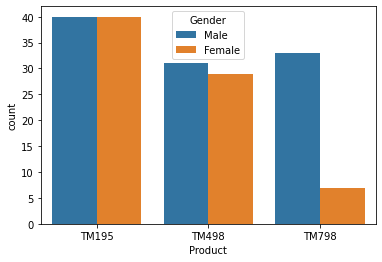

In [26]:
# Q3: Which product of treadmill has been frequently used by male 
sb.countplot(x="Product", hue="Gender", data=data_19BCE2167)
# From plotted data, wew can see that the TM195 is the treadmill used by most males

In [27]:
# Q4: How many objects are there in the datasets
data_19BCE2167.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

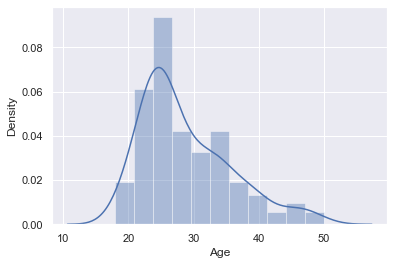

In [28]:
# Q5: What your intution says about the numeric attributes such as Age, Income, Miles, and usage are normally distributed? Justified through required graphic
sb.set(color_codes=True)
sb.distplot(data_19BCE2167['Age'])
# With a single peak and tapering at both ends, the age is somewhat normally distributed

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Miles', ylabel='Density'>

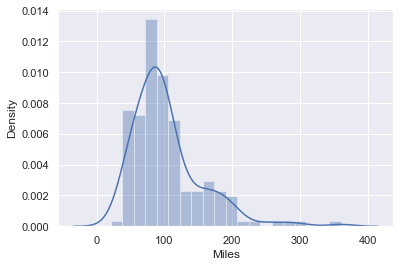

In [30]:
sb.set(color_codes=True)
sb.distplot(data_19BCE2167['Miles'])
# With a single peak and tapering at both ends, miles are somewhat normally distributed

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

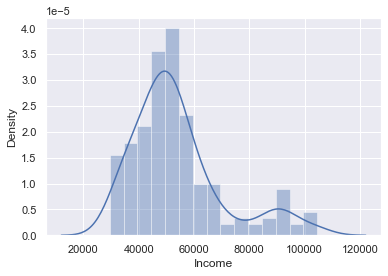

In [32]:
sb.set(color_codes=True)
sb.distplot(data_19BCE2167['Income'])
#Income is not normally distributed.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Usage', ylabel='Density'>

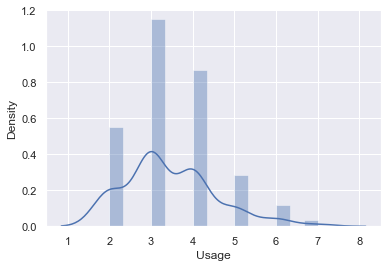

In [34]:
sb.distplot(data_19BCE2167['Usage'], hist=True)
# While it may not seem like it, usage data IS normally distributed, but since the curve tracks continuous changes in what is discrete data, it does not represent the Bell shape. But the bar plot proves tous that it is a normal distribution

<AxesSubplot:ylabel='Age'>

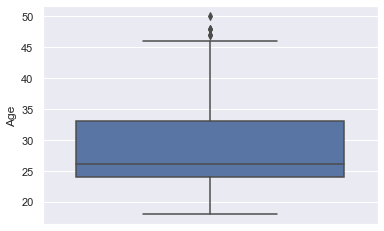

In [36]:
# Q6: Find the outlier if any exists in the variable Age. Hint: calcualte the IQR and use to filter the ourlier 
sb.boxplot(y="Age", data=data_19BCE2167)
# There are 3 outliers in the given data

<AxesSubplot:xlabel='Income', ylabel='Age'>

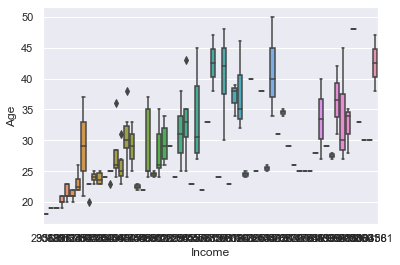

In [38]:
# Q7: Which plot is required to display five statistics of the variables Income with respect to Age. Display the graphics
sb.boxplot(x="Income", y="Age", data=data_19BCE2167)
# The five statistics that can be seen are the Lower and Upper bound of the range, and the quartile values

<AxesSubplot:xlabel='Product', ylabel='count'>

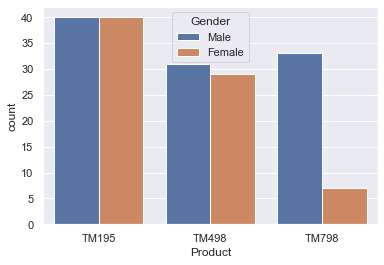

In [39]:
# Q8: How do you compare among the product of treadmill? or Which product is frequently used by gender-wise. Show your result through plot.
sb.countplot(x="Product", hue="Gender", data=data_19BCE2167)
# From the given plot, we can see that the TM195 is the most frequently used treadmill by both genders

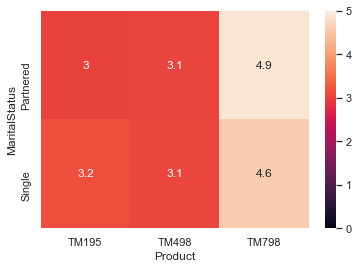

In [40]:
# Q9: Is maritial status affect the utiliation of the product of the treadmill? If so justify your results through the index matrix form
df_heatmap = data_19BCE2167.pivot_table(values='Usage',index='MaritalStatus',columns='Product')
sb.heatmap(df_heatmap, annot=True,vmin=0,vmax=5);

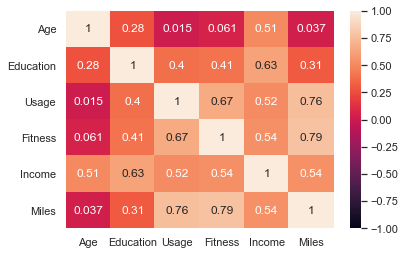

In [42]:
# Q10: How do you explain the relation between the numeric attributes? Which variables are correlated and quatify the relation? 
corr = data_19BCE2167.corr()
sb.heatmap(corr, annot=True,vmin=-1,vmax=1);
# Lighter cells indicate greater correlation between the attributes on the axes

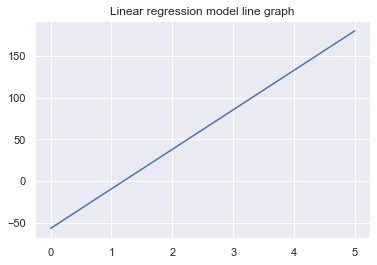

In [46]:
# Q11: Develope a model which can predict distance in miles with respect to fitness and usage. 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x=data_19BCE2167[['Fitness', 'Usage']]
y=data_19BCE2167['Miles']
model.fit(x,y)
c=model.coef_
c=np.round(c,2)
i=model.intercept_
i=np.round(i,2)
x=np.linspace(0,5,100)
z=np.linspace(0,5,100)
y=c[0]*x+c[1]*z+i
plt.plot(x,y)
plt.title('Linear regression model line graph')
plt.show()